# Glow Curves effect in Matplotlib

In case you ever wanted to make plots that look like the data is glowing on the screen, here you go. This is best in general public talks with a dark slide background color

Let's show what the data looks like just plotting some... meh colors

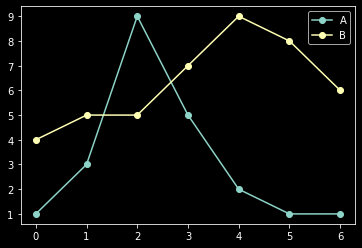

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")

df = pd.DataFrame({'A': [1, 3, 9, 5, 2, 1, 1],
                   'B': [4, 5, 5, 7, 9, 8, 6]})
df.plot(marker='o')
plt.show()

Now make it GLOW!

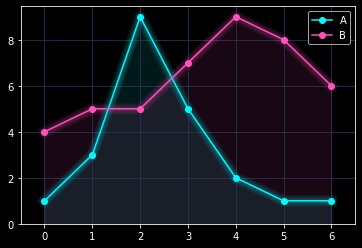

In [2]:
### Text Color ###
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '1.0'  # white (value goes from 0 to 1)
    
### Figure Color ###
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#000000'  # Hex Color Code for Background Color
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]

################################################
#                     DATA
################################################

df = pd.DataFrame({'A': [1, 3, 9, 5, 2, 1, 1],
                   'B': [4, 5, 5, 7, 9, 8, 6]})


################################################
#                  PLOT DATA
################################################

fig, ax = plt.subplots()
df.plot(marker='o', color=colors, ax=ax)

################################################
#                 GLOW EFFECT
################################################
# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    df.plot(marker='o',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)

################################################
#            COLOR AREA BELOW CURVE
################################################
# Color the areas below the lines:
for column, color in zip(df, colors):
    ax.fill_between(x=df.index,
                    y1=df[column].values,
                    y2=[0] * len(df),
                    color=color,
                    alpha=0.1)
ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0] - 0.2, ax.get_xlim()[1] + 0.2])  # to not have the markers cut off
ax.set_ylim(0)
plt.show()

We can also do this effect for continuous data

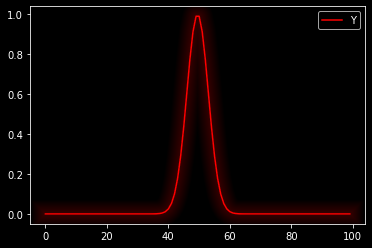

In [3]:
import numpy as np

x = np.linspace(-10,10,100)
y = np.exp(-x**2)

# plt.plot(x,y, 'r-')

df = pd.DataFrame({'Y':y})

fig, ax = plt.subplots()
df.plot(color='red', ax=ax)
# Redraw the data with low alpha and slighty increased linewidth:
n_shades = 25
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    df.plot(linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color='red')